# Pymaceuticals Inc.
---

### Analysis

- A study was performed with 248 mice to see the impact of different drugs on tumor size. The mouse population was roughly 50/50 by gender. In the Capomulin drug regimen, larger mice had larger tumors. The correlation coefficient of .95 was very high. 
 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from statistics import variance
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single DataFrame
total_mouse_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
total_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mouse_count = len(total_mouse_study["Mouse ID"].unique())
mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.
duplicated = total_mouse_study[total_mouse_study.duplicated(subset=['Mouse ID','Timepoint'])]
print (duplicated)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = total_mouse_study[total_mouse_study['Mouse ID'] != "g989"]
clean_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_mouse["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [9]:
# Assemble the resulting series into a single summary DataFrame.
single_summary = pd.DataFrame(
            {"Mean Tumor Volume":mean_tumor_volume,
             "Median Tumor Volume":median_tumor_volume,
             "Tumor Volume Variance":tumor_volume_variance,
             "Tumor Volume Std. Dev.":tumor_volume_std_dev,
             "Tumor Volume Std. Err.":tumor_volume_std_err})
single_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen by Observed Mouse Timepoints'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

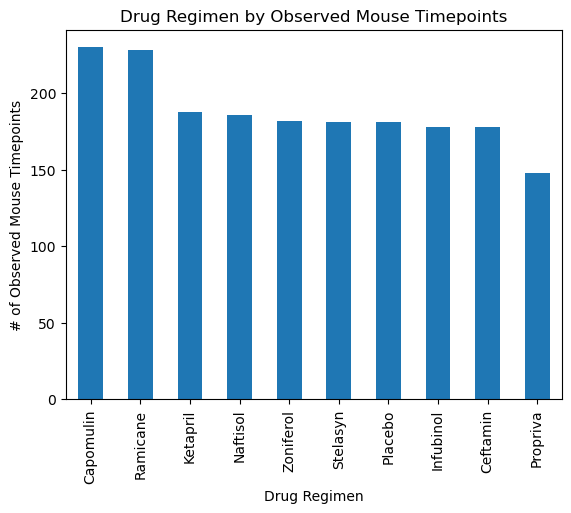

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = clean_mouse["Drug Regimen"].value_counts()
mouse_timepoints.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", title = "Drug Regimen by Observed Mouse Timepoints")


Text(0.5, 1.0, 'Drug Regimen by Observed Mouse Timepoints')

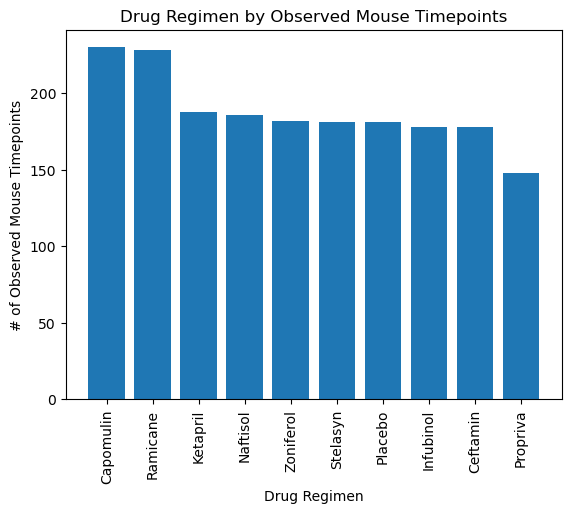

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_timepoints.index, mouse_timepoints.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.title("Drug Regimen by Observed Mouse Timepoints")

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_mouse.groupby("Sex")["Mouse ID"].nunique()
gender


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

<Axes: title={'center': 'Mouse Gender'}, ylabel='Mouse ID'>

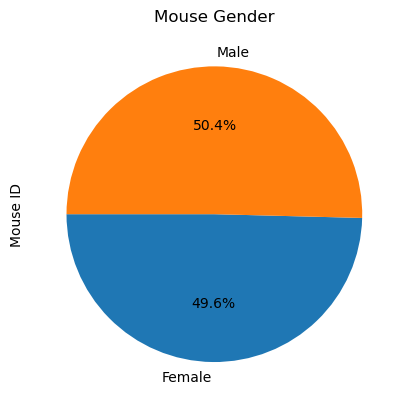

In [40]:
# Make the pie chart
gender.plot(kind="pie", labels=clean_mouse["Sex"], autopct='%1.1f%%', startangle=180, title = "Mouse Gender")

Text(0.5, 1.0, 'Mouse Gender')

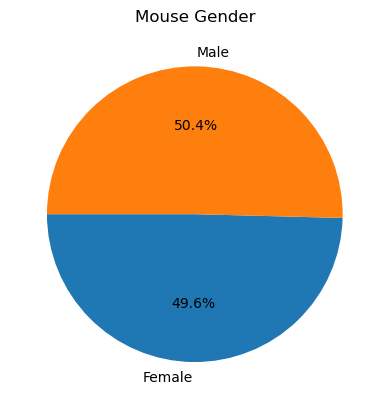

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(gender, labels = gender.index,autopct="%1.1f%%", startangle=180)
plt.title("Mouse Gender")


## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_mouse_four = clean_mouse.loc[clean_mouse["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
clean_mouse_four
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_four.groupby("Mouse ID")["Timepoint"].max()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_drug_study = pd.merge(clean_mouse_four, max_timepoint, how="left", on="Mouse ID")
four_drug_study

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,c326,0,45.000000,0,Infubinol,Female,18,25,5
2,c139,0,45.000000,0,Infubinol,Male,11,28,45
3,v339,0,45.000000,0,Infubinol,Male,20,26,5
4,a577,0,45.000000,0,Infubinol,Female,6,25,30
...,...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17,45
810,i177,45,33.562402,3,Ramicane,Male,10,18,45
811,r944,45,41.581521,2,Capomulin,Male,12,25,45
812,u364,45,31.023923,3,Capomulin,Male,18,17,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


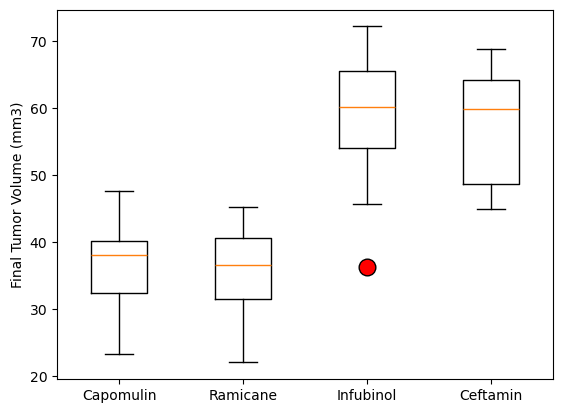

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

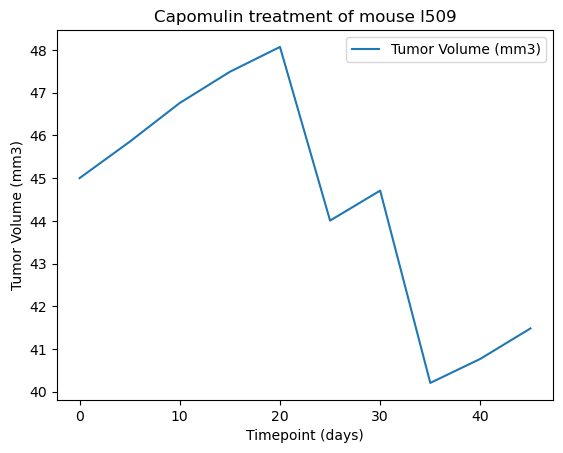

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = four_drug_study[four_drug_study['Mouse ID'] == "l509"]
mouse_l509.plot(x="Timepoint_x", y="Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

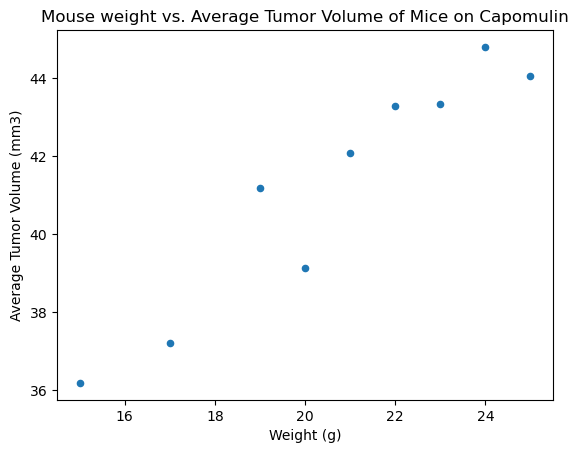

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_study = four_drug_study[four_drug_study['Drug Regimen'] == "Capomulin"]
average_tumor_volume = capomulin_study.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
new_df_for_chart = average_tumor_volume.reset_index()
new_df_for_chart.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")
plt.title("Mouse weight vs. Average Tumor Volume of Mice on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.9505243961855268


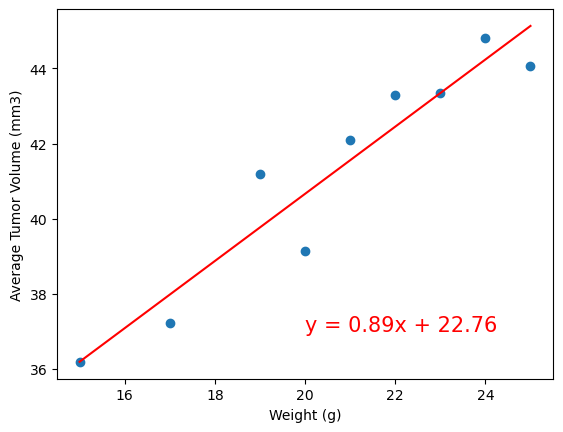

In [72]:
# Calculate the correlation coefficient and a linear regression model
correlation = new_df_for_chart["Weight (g)"].corr(new_df_for_chart["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Add the linear regression equation and line to plot
x_values = new_df_for_chart["Weight (g)"]
y_values = new_df_for_chart["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()